In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing.csv')
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [3]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
change_value = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in change_value:
  df[i] = df[i].map({'yes' : 1, 'no': 0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


1) Target distribution (price)
- Why helpful?

  - checks if price is skewed

  - tells if you might need log(price) later

  - identifies extreme outliers

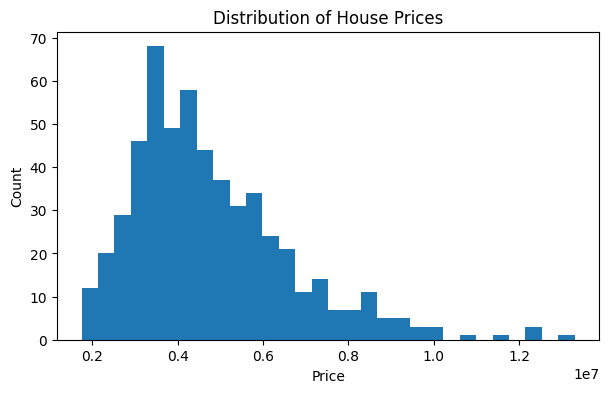

In [6]:
plt.figure(figsize=(7,4))
plt.hist(df["price"], bins=30)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

2) Correlation Heatmap (numeric features)
- Why helpful?

  - tells which features relate most with price

  - helps detect multicollinearity (e.g. bedrooms vs bathrooms)

Bright colors (high positive) → strong positive dependency

Dark colors (high negative) → strong inverse dependency

- Important: correlation = linear relationship only. Non-linear relationships may exist even if corr ≈ 0

| Value | Meaning                                                          |
| ----- | ---------------------------------------------------------------- |
| +1    | Perfect **positive correlation** → as variable X ↑, variable Y ↑ |
| 0     | No linear correlation → variables independent (linearly)         |
| -1    | Perfect **negative correlation** → as variable X ↑, variable Y ↓ |


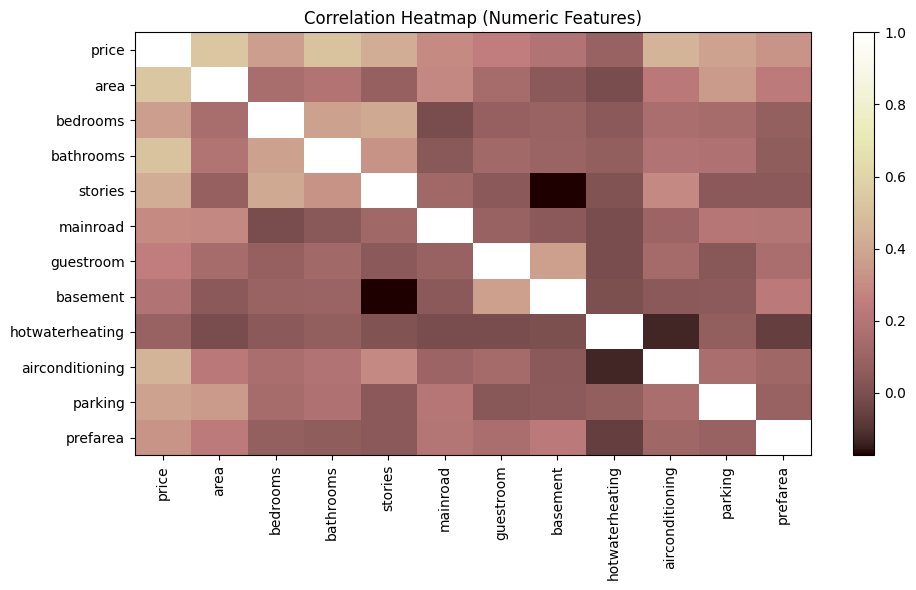

In [7]:
num_cols = df.select_dtypes(include = ['int64']).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
plt.imshow(corr, aspect="auto", cmap = "pink")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


3) Scatter: area vs price
- Why helpful?

  - confirms the strongest linear relationship usually exists here

  - shows outliers (huge area but low price, etc.)

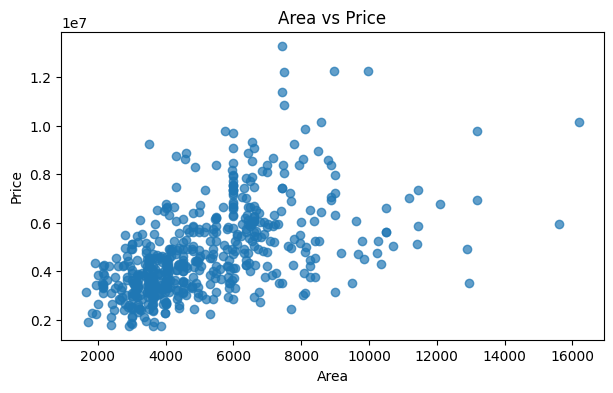

In [8]:
plt.figure(figsize=(7,4))
plt.scatter(df["area"], df["price"], alpha=0.7)
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

<Figure size 500x300 with 0 Axes>

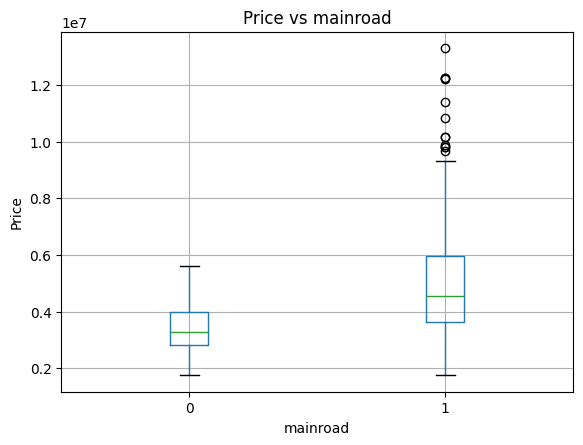

<Figure size 500x300 with 0 Axes>

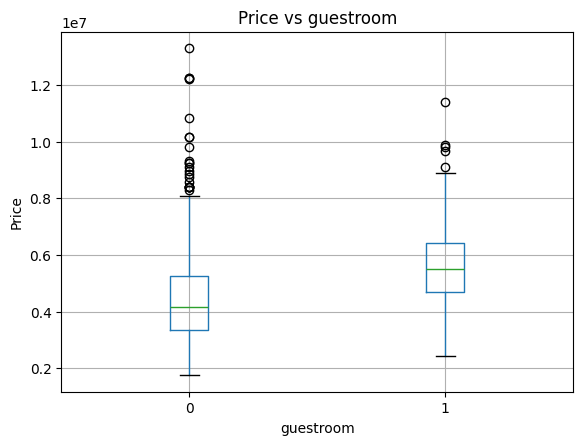

<Figure size 500x300 with 0 Axes>

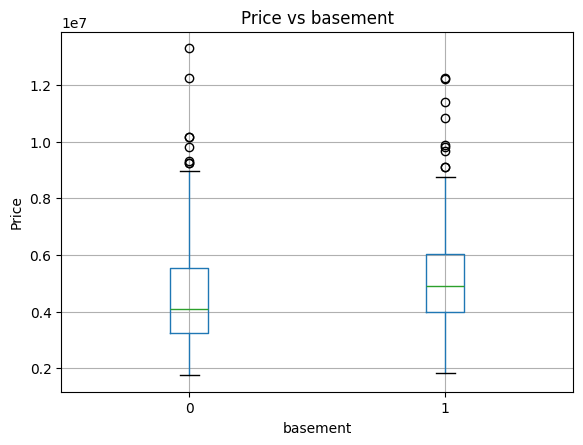

<Figure size 500x300 with 0 Axes>

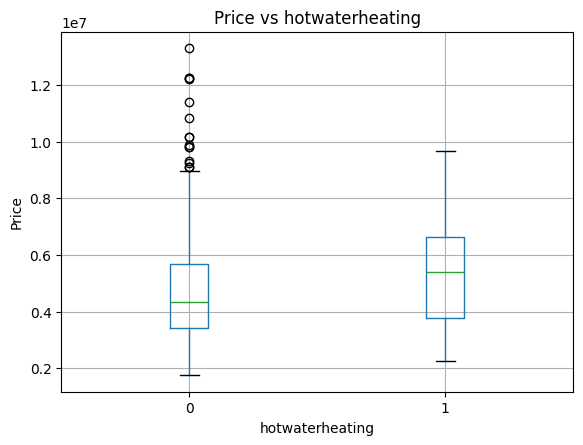

<Figure size 500x300 with 0 Axes>

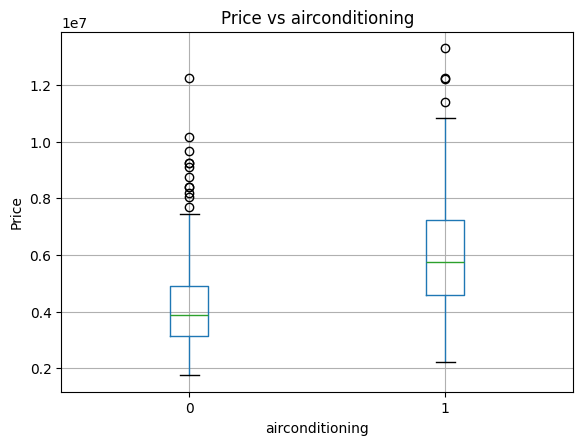

<Figure size 500x300 with 0 Axes>

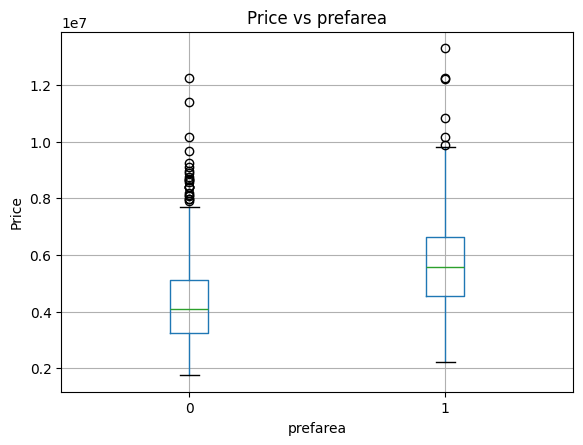

In [9]:
bin_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]

for c in bin_cols:
    plt.figure(figsize=(5,3))
    df.boxplot(column="price", by=c)
    plt.title(f"Price vs {c}")
    plt.suptitle("")
    plt.xlabel(c)
    plt.ylabel("Price")
    plt.show()

<Figure size 700x400 with 0 Axes>

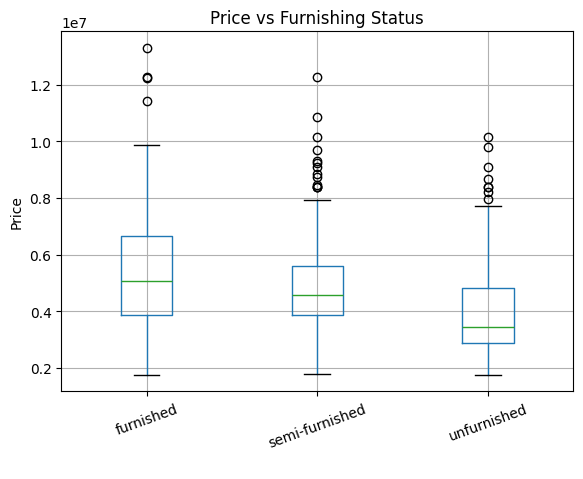

In [10]:
plt.figure(figsize = (7,4))

df.boxplot(column="price", by="furnishingstatus")
plt.title("Price vs Furnishing Status")
plt.suptitle("")
plt.xlabel(" ")
plt.ylabel("Price")
plt.xticks(rotation=20)
plt.show()

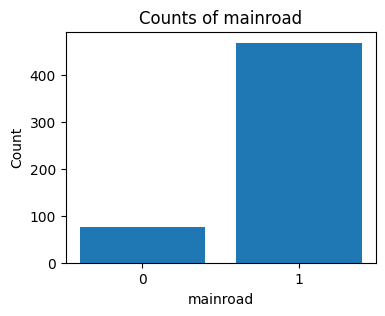

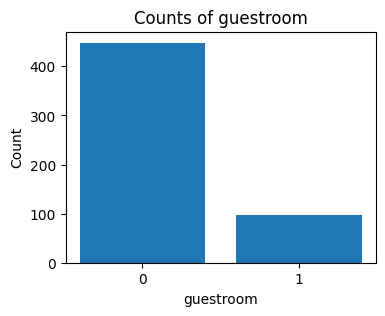

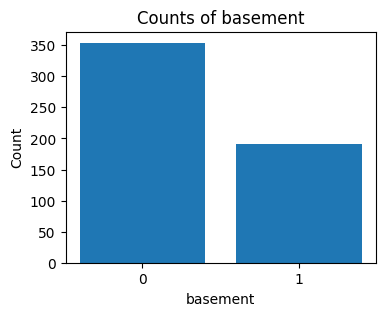

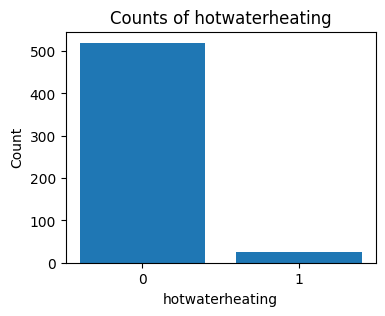

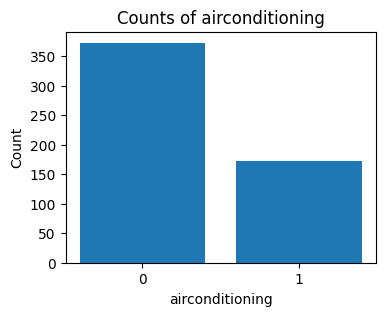

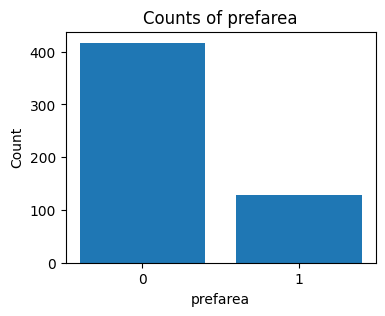

In [11]:
bin_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]

for c in bin_cols:
    vc = df[c].value_counts().sort_index()
    plt.figure(figsize=(4,3))
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"Counts of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

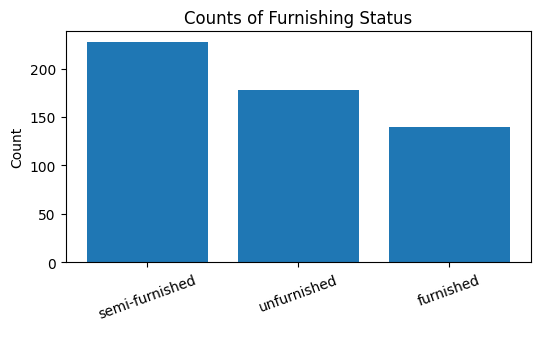

In [12]:
import matplotlib.pyplot as plt

vc = df["furnishingstatus"].value_counts()

plt.figure(figsize=(6,3))
plt.bar(vc.index, vc.values)
plt.title("Counts of Furnishing Status")
plt.xlabel(" ")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.show()


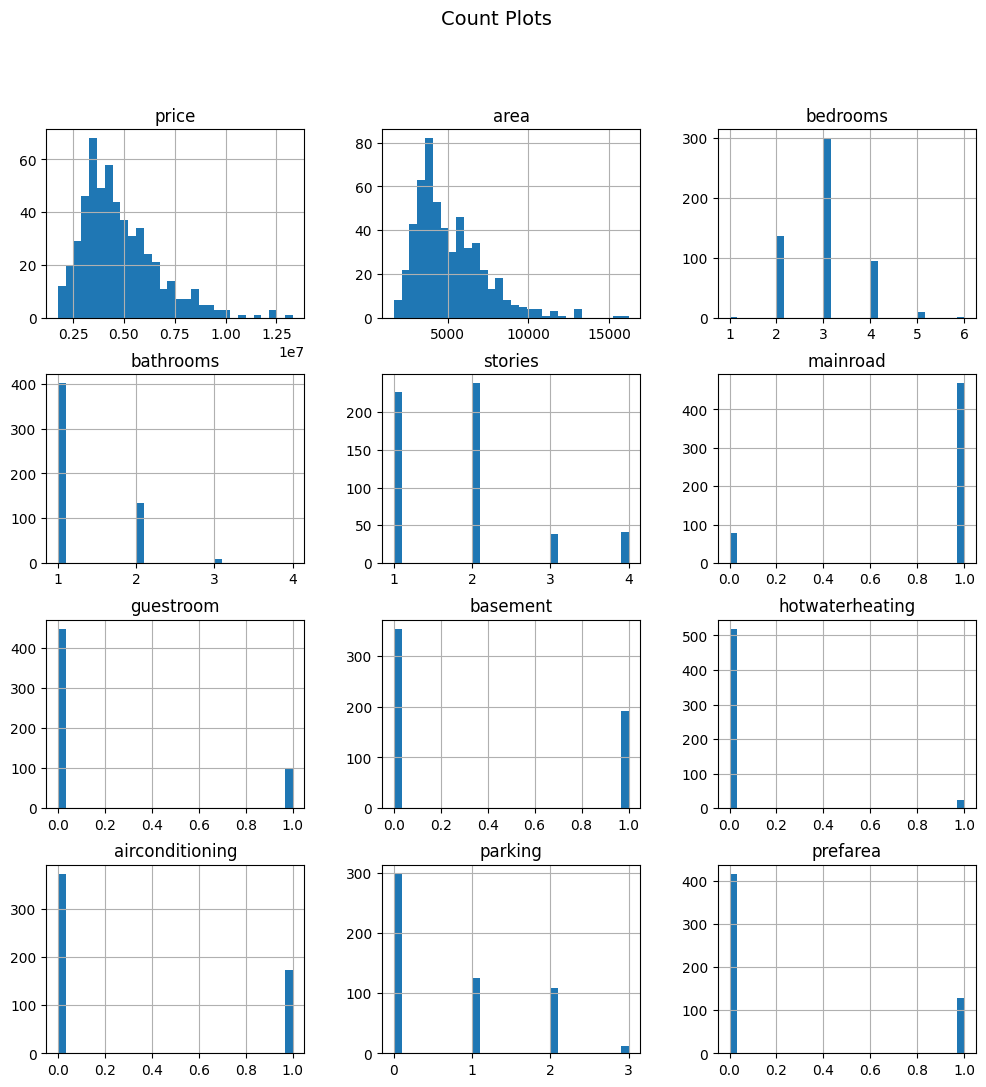

In [13]:
df.hist(bins=30, figsize=(12,12))
plt.suptitle("Count Plots", fontsize = 14)
plt.show()

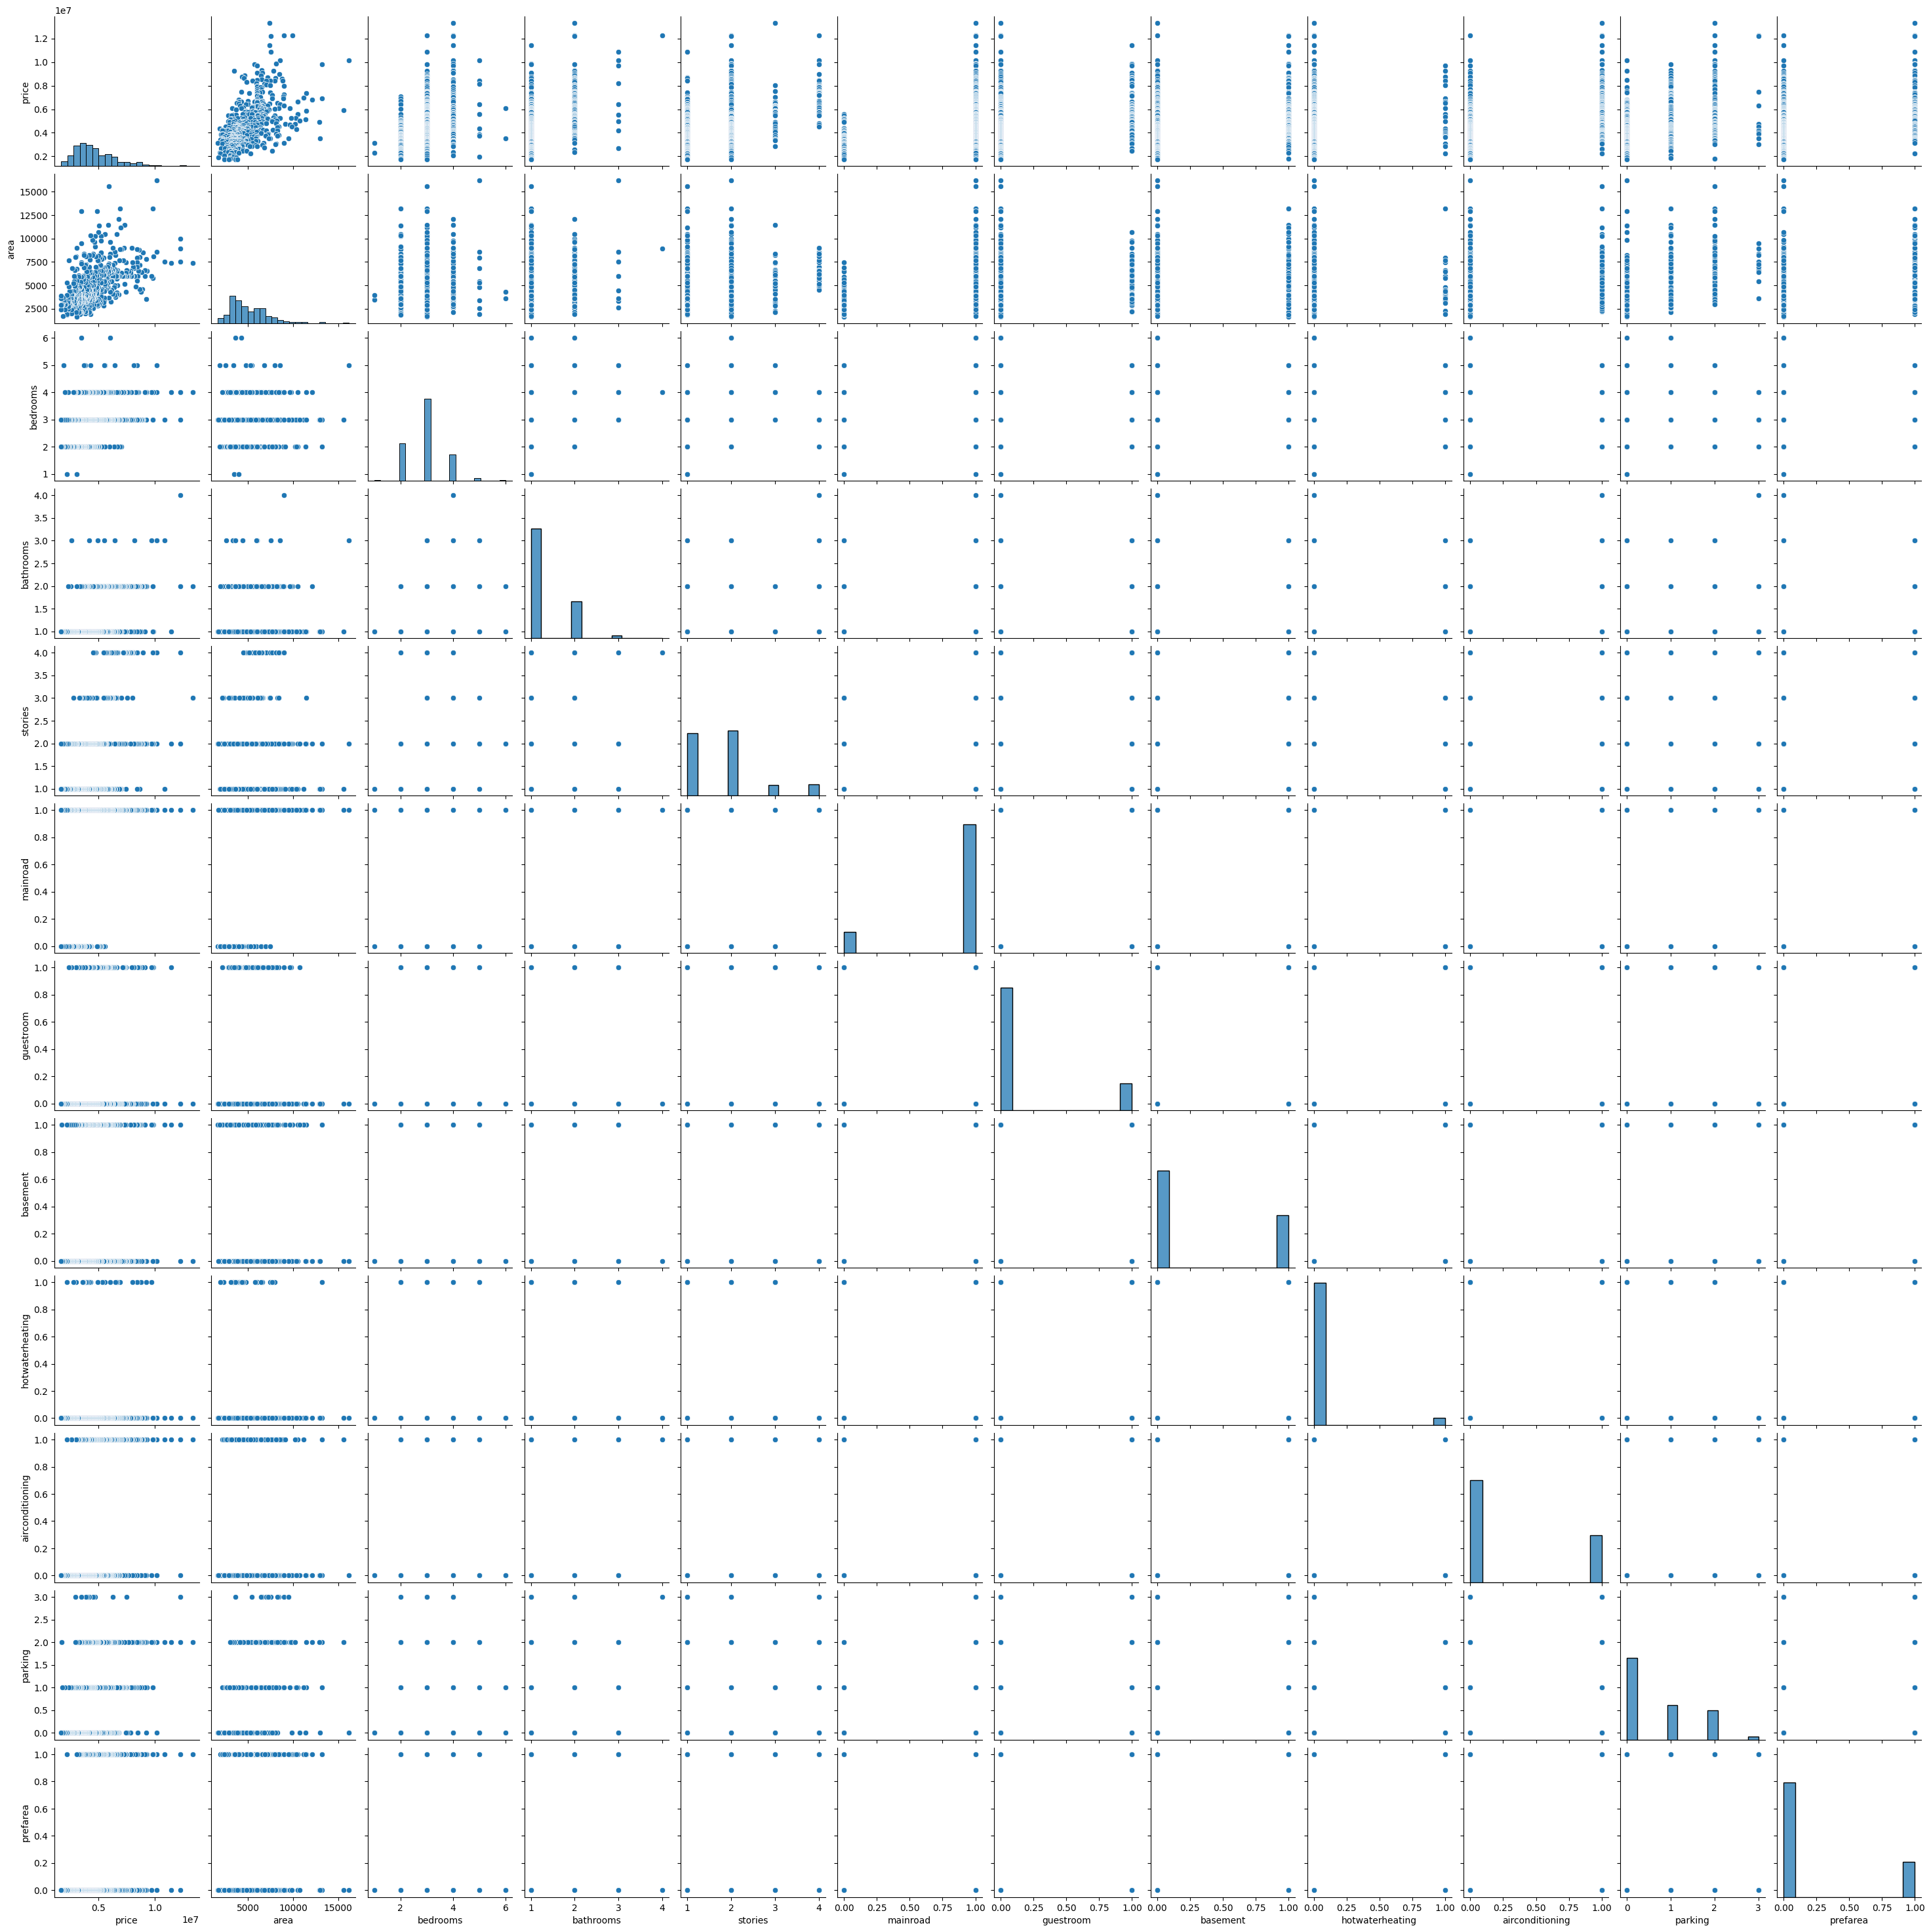

In [14]:
sns.pairplot(df)

In [15]:
furnishing_value = pd.get_dummies(df['furnishingstatus'].astype(str), dtype = 'int', drop_first= True)
furnishing_value

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [16]:
df = pd.concat([df, furnishing_value], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [17]:
df.drop(columns = ['furnishingstatus'], axis = 1, inplace = True)
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    int64
 13  unfurnished      545 non-null    int64
dtypes: int64(14)
memory usage: 59.7 KB


### New variable creation
- bedroom bathroom ration

In [19]:
df['bbration'] = df['bedrooms']/df['bathrooms']
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bbration
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,1.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,4.0


In [20]:
df.shape

(545, 15)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
X = df.drop(columns = ['price'], axis = 1)
y = df['price']

X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bbration
0,7420,4,2,3,1,0,0,0,1,2,1,0,0,2.0
1,8960,4,4,4,1,0,0,0,1,3,0,0,0,1.0
2,9960,3,2,2,1,0,1,0,0,2,1,1,0,1.5
3,7500,4,2,2,1,0,1,0,1,3,1,0,0,2.0
4,7420,4,1,2,1,1,1,0,1,2,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,1,2.0
541,2400,3,1,1,0,0,0,0,0,0,0,1,0,3.0
542,3620,2,1,1,1,0,0,0,0,0,0,0,1,2.0
543,2910,3,1,1,0,0,0,0,0,0,0,0,0,3.0


In [24]:
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 42)

X_train.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,bbration
126,7160,3,1,1,1,0,1,0,0,2,1,0,1,3.0
363,3584,2,1,1,1,0,0,1,0,0,0,1,0,2.0


#### random_state controls the randomness of the data splitting.

  - It sets the seed for the random number generator.

  - Using the same random_state → you get the exact same train/test split every time.

  - Changing it (or removing it) → different splits each run.

  

In [25]:
y_train.shape

(381,)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scale = StandardScaler()

In [28]:
## doing only with scale remove the column names and returns numpy array.
# to save features name we did this

X_train_s = pd.DataFrame(
    scale.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_s = pd.DataFrame(
    scale.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


In [29]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)

y_pred = lr.predict(X_test_s)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression result")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2:", r2)

Linear Regression result
MAE: 920296.2243784411
MSE: 1525436993940.9248
RMSE: 1235085.8245243223
r2: 0.6457737072995235


## R² measures how well your model explains the variability of the target variable.


R2 = 1 − (SSresidual/ SStotal)

Where:
    - (it's y cap i )
- SSresidual =
∑
(
𝑦
𝑖
−
𝑦
^
𝑖
) ^2  → error of your model

- SStotal =
∑
(
𝑦
𝑖
−
𝑦
ˉ
) ^ 2
 → variance of target  (mean of y)


In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
dt = DecisionTreeRegressor(random_state = 42)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree result")
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("R2:", r2_dt)

Decision Tree result
MAE: 1222459.0853658537
MSE: 3418032605020.122
RMSE: 1848792.2016873942
R2: 0.20628841255667207


#### **n_jobs controls parallel processing — how many CPU cores the algorithm will use when training or predicting.**

Using multiple cores speeds up training a lot.

How it works

- n_jobs = 1 → use only 1 CPU core (default in some cases)

- n_jobs = -1 → use all available CPU cores

- n_jobs = 2 → use 2 CPU cores

- n_jobs = None → same as 1 (usually default)

Important:

- Single Decision Tree (DecisionTreeClassifier/Regressor) doesn’t benefit much from parallelization, because building one tree is mostly sequential.

- Random Forest or Gradient Boosted Trees benefit a lot because multiple trees can be trained independently.

In [32]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forect Result")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)

Random Forect Result
MAE: 966341.9165650406
MSE: 1854287396798.1616
RMSE: 1361722.2171934193
R2: 0.5694103704197518


In [33]:
res = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [mae, mae_dt, mae_rf],
    "MSE": [mse, mse_dt, mse_rf],
    "RMSE": [rmse, rmse_dt, rmse_rf],
    "R2": [r2, r2_dt, r2_rf]
})

print(res)

               Model           MAE           MSE          RMSE        R2
0  Linear Regression  9.202962e+05  1.525437e+12  1.235086e+06  0.645774
1      Decision Tree  1.222459e+06  3.418033e+12  1.848792e+06  0.206288
2      Random Forest  9.663419e+05  1.854287e+12  1.361722e+06  0.569410


### ✅ RMSE (main)

- RMSE is in same unit as price

- It penalizes large errors more

- Lower RMSE = better

So if RMSE = 1.23e6, it means:

- on average the model error is around ~12.3 lakhs (if price is INR) (or 1.23M currency units)

###✅ R² (main)

- tells how much variance is explained

- 1.0 is perfect, 0 = no better than mean, negative = terrible

- Higher R² = better

##### Variance = how much the target values (y) spread out around their mean.
##### When we say: R² tells how much variance is explained

we mean:
👉 How much of the variation in y is captured by the model instead of being left as error

### **RF & DT both but overfit took into cosideration**
### **Controlled RF (better generalization)**

In [34]:
def eval_reg(m, Xtr, Xte, ytr, yte):
    m.fit(Xtr, ytr)

    p_tr = m.predict(Xtr)
    p_te = m.predict(Xte)

    out = {
        "Train_RMSE": np.sqrt(mean_squared_error(ytr, p_tr)),
        "Test_RMSE": np.sqrt(mean_squared_error(yte, p_te)),
        "Train_R2": r2_score(ytr, p_tr),
        "Test_R2": r2_score(yte, p_te),
    }
    return out


 Now:

- Train_R2 will drop a bit

- Test_R2 usually improves

- That’s good ML.

In [35]:
dt_good = DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5
)

res_dt_good = eval_reg(dt_good, X_train, X_test, y_train, y_test)
print("DT (controlled):", res_dt_good)


DT (controlled): {'Train_RMSE': np.float64(907226.0863242493), 'Test_RMSE': np.float64(1569161.5080058225), 'Train_R2': 0.7380098322737363, 'Test_R2': 0.4282294113567975}


In [36]:
rf_good = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=12,
    min_samples_leaf=3,
    max_features="sqrt"
)

res_rf_good = eval_reg(rf_good, X_train, X_test, y_train, y_test)
print("RF (controlled):", res_rf_good)


RF (controlled): {'Train_RMSE': np.float64(845274.1244401907), 'Test_RMSE': np.float64(1289898.6519203326), 'Train_R2': 0.772569302551913, 'Test_R2': 0.6136350716131876}


**Recommended Orderof CV and GridSearchCV**(industry workflow)

- Train/Test split + baseline models (LR, DT, RF)

- K-Fold CV on baseline models (to see stability) ✅

- GridSearchCV / RandomizedSearchCV on the best candidates ✅

- Final evaluation on untouched test set ✅

## **Why this order?**

1) K-Fold CV first (coarse selection)

- Purpose: Estimate how well a model performs on unseen data.

#### **How it works:**

  - Split data into K folds

  - Train on K−1 folds

  - Validate on the remaining fold

  - Repeat K times

  - Average the scores

**What it answers:**

“How good is this model with these fixed parameters?”

**Purpose (acc to dataset):**

  - compare LR vs DT vs RF quickly

  - identify which model family is worth tuning

  - If DT is clearly weak, don’t waste time tuning it.


### **2) GridSearchCV next (fine tuning)**
##### **Find the best hyperparameters for a model.**

- Purpose:

  - tune hyperparameters using CV internally

  - get best configuration

📌 Important:
GridSearchCV already does cross-validation, so you don’t need to separately do KFold CV again for that tuned model (except final reporting).

In [40]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import Pipeline

Even though you already scaled LR earlier, when you use K-Fold CV you must scale inside the CV process, and the clean way is exactly the Pipeline you mentioned.

**Why your earlier scaling is NOT enough for KFold**

**When you did:**

  - split train/test

  - fit scaler on X_train

  - transform X_train, X_test

That is correct for one split.

But in KFold, the training set changes in every fold:

Fold 1: train = 80%, val = 20%

Fold 2: different train/val split

… and so on

So if you use scaling done only once, then:
🚨 the scaler has “seen” data from folds that should be validation
→ data leakage

In [41]:
lr_kfold = Pipeline(
    [
        ("sc", StandardScaler()),
        ("m", LinearRegression())
    ])

**DT and RF don’t need scaling**

In [42]:
dt_kfold = DecisionTreeRegressor(
    random_state=42,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5
)

rf_kfold = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    max_depth=12,
    min_samples_leaf=3,
    max_features="sqrt"
)

All scoring functions in scikit-learn are designed so that “higher is better.”

This makes it easier to compare models or hyperparameters programmatically.

Example:

Accuracy → higher is better ✅

R² → higher is better ✅

But RMSE / MAE → lower is better ❌

To make RMSE/MAE fit the “higher is better” convention, sklearn stores them as negative values.

2️⃣ Why this is useful internally

When using cross_validate, GridSearchCV, or RandomizedSearchCV, sklearn chooses the model with the highest score.

If RMSE were positive, the best model would be the one with the smallest score, which breaks the “maximize score” convention.

By flipping the sign, maximizing -RMSE is the same as minimizing RMSE.

So internally:

best_model = argmax(-RMSE)


is equivalent to:

best_model = argmin(RMSE)

In [43]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

scoring = {
    "mae" : "neg_mean_absolute_error",
    "rmse" : "neg_root_mean_squared_error",
    "r2" : "r2"
}

models = {
    "Linear Regression" : lr_kfold,
    "Decision Tree" : dt_kfold,
    "Random Forest" : rf_kfold
}

row = []

for name, model in models.items():
  cv_res = cross_validate(model, X, y, cv = cv, scoring = scoring, n_jobs = -1)

  row.append({
      "Model" : model,
      "RMSE_mean": -cv_res["test_rmse"].mean(),
      "RMSE_std": cv_res["test_rmse"].std(),
      "MAE_mean": -cv_res["test_mae"].mean(),
      "R2_mean": cv_res["test_r2"].mean()
    })

cv_table = pd.DataFrame(row).sort_values(by="RMSE_mean")
cv_table

,Model,RMSE_mean,RMSE_std,MAE_mean,R2_mean
0,"(StandardScaler(), LinearRegression())",1.086886e+06,141801.684886,809600.490441,0.630600
2,"RandomForestRegressor(max_depth=12, max_featur...",1.098283e+06,210116.693584,791072.388629,0.635652
1,"DecisionTreeRegressor(max_depth=6, min_samples...",1.293794e+06,176308.347291,949530.503617,0.470299


In [44]:
best_model_name = cv_table.iloc[0]["Model"]
print("Best model based on CV:", best_model_name)

Best model based on CV: Pipeline(steps=[('sc', StandardScaler()), ('m', LinearRegression())])


Tuning LR & DT as these were good in both the scenarios.
- Using Ridge to tune LR bcz of correlatation.
- RandomizedSearchCV for RandomForest

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [46]:
'''
np.logspace(-3, 3, 20)
This creates 20 numbers spaced evenly on a log scale between: 10^-3 and 10^3
So roughly ---> 0.001, 0.002, 0.004, 0.01, ..., 1, ..., 100, ..., 1000


Why log scale instead of linear scale?

Because:
  Changing α from 0.001 → 0.01 is a big change
  Changing α from 100 → 101 is almost nothing
  So α behaves exponentially, not linearly.

logspace explores:
  very weak regularization
  medium regularization
  very strong regularization

all in one sweep.
'''

'\nnp.logspace(-3, 3, 20)\nThis creates 20 numbers spaced evenly on a log scale between: 10^-3 and 10^3\nSo roughly ---> 0.001, 0.002, 0.004, 0.01, ..., 1, ..., 100, ..., 1000\n\n\nWhy log scale instead of linear scale?\n\nBecause:\n  Changing α from 0.001 → 0.01 is a big change\n  Changing α from 100 → 101 is almost nothing\n  So α behaves exponentially, not linearly.\n\nlogspace explores:\n  very weak regularization\n  medium regularization\n  very strong regularization\n\nall in one sweep.\n'

In [47]:
ridge_pipeline = Pipeline([
    ("sc", StandardScaler()),
    ("rg", Ridge())
])

param_grid = {
    "rg__alpha" : np.logspace(-3, 3, 20)
    # it's double underscore
}

gs_ridge = GridSearchCV(
    ridge_pipeline,
    param_grid = param_grid,
    cv = cv,
    scoring = "neg_root_mean_squared_error",
    n_jobs = -1
)

gs_ridge.fit(X_train, y_train)

print("Best CV RMSE :", -gs_ridge.best_score_)
print("Best alpha :", gs_ridge.best_params_["rg__alpha"])

Best CV RMSE : 1017877.3614950243
Best alpha : 26.366508987303554


In [48]:
best_ridge = gs_ridge.best_estimator_

y_pred = best_ridge.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRidge Test Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)



Ridge Test Results
MAE: 917245.7795315428
RMSE: 1235349.69182573
R2: 0.6456223352757311


In [49]:
coefs = best_ridge.named_steps["rg"].coef_
coef_table = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": coefs
}).sort_values(by="Coefficient", ascending=False)

coef_table.head(10)


,Feature,Coefficient
0,area,520164.231136
2,bathrooms,424020.449567
3,stories,339705.901441
8,airconditioning,314984.131706
9,parking,252075.860939
6,basement,214353.811604
10,prefarea,210076.190343
1,bedrooms,150600.094578
4,mainroad,144632.046316
7,hotwaterheating,126755.751050


In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    "n_estimators": [200, 400, 600, 800],
    "max_depth": [None, 8, 12, 16, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 3, 5, 10],
    "max_features": ["sqrt", "log2", None]
}

rs_rf = RandomizedSearchCV(
    rfr,
    param_distributions=param_dist,
    n_iter=30,
    cv=cv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    random_state=42
)

rs_rf.fit(X_train, y_train)

print("Best RF RMSE:", -rs_rf.best_score_)
print("Best params:", rs_rf.best_params_)

Best RF RMSE: 1059441.0893599414
Best params: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 8}


In [52]:
best_model = rs_rf.best_estimator_

y_pred = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R2: ", r2)
#Your model explains ~84.9% variance in house prices.

RMSE:  1271905.5792955712
R2:  0.6243388668128333


In [53]:
rf_best = rs_rf.best_estimator_
y_pred = rf_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned RF Test Metrics")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

Tuned RF Test Metrics
MAE: 937958.9328508951
RMSE: 1271905.5792955712
R2: 0.6243388668128333


**Error distribution (Absolute Error)**

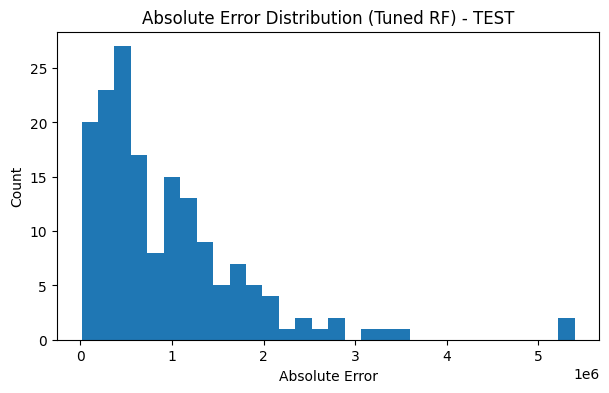

'\nmost errors are concentrated in lower range\nlong tail toward high errors → a few very bad predictions\n\nMeaning\nMost test cases are predicted reasonably well\nFew houses have very high error → these may be:\n  luxury houses\n  outliers\n  unusual facilities combination\n  noise in data\n'

In [57]:
abs_err = np.abs(res)

plt.figure(figsize=(7,4))
plt.hist(abs_err, bins=30)
plt.title("Absolute Error Distribution (Tuned RF) - TEST")
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.show()

'''
most errors are concentrated in lower range
long tail toward high errors → a few very bad predictions

Meaning
Most test cases are predicted reasonably well
Few houses have very high error → these may be:
  luxury houses
  outliers
  unusual facilities combination
  noise in data
'''

In [58]:
'''
Overall conclusion from all plots (final story)

✅ Strong points
  model captures trend well
  residuals centered around 0 (no major bias)
  majority predictions have low-moderate error

⚠️ Weak points
  high-price houses have higher error
  some significant outliers
  error variance increases with price (common in housing)
'''

'\nOverall conclusion from all plots (final story)\n\n✅ Strong points\n  model captures trend well\n  residuals centered around 0 (no major bias)\n  majority predictions have low-moderate error\n\n⚠️ Weak points\n  high-price houses have higher error\n  some significant outliers\n  error variance increases with price (common in housing)\n'

**Feature importance (Top 15)**

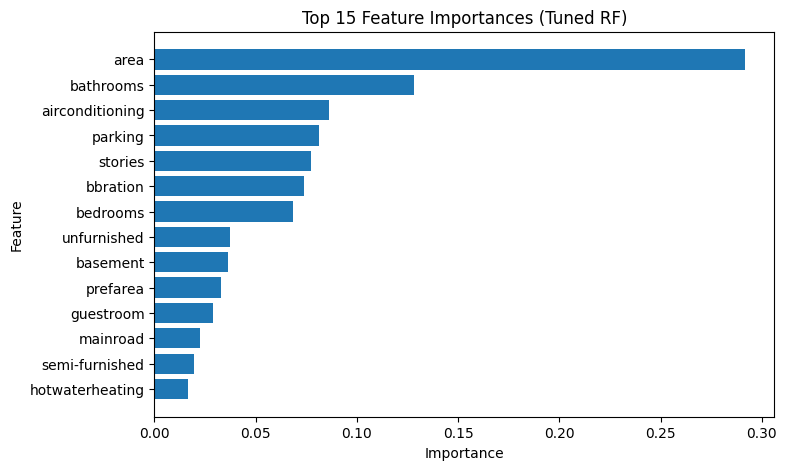

In [59]:
imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_best.feature_importances_
}).sort_values(by="Importance", ascending=False)

top = imp.head(15)

plt.figure(figsize=(8,5))
plt.barh(top["Feature"][::-1], top["Importance"][::-1])
plt.title("Top 15 Feature Importances (Tuned RF)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


**Final model = Tuned Random Forest Regressor**

Because:

- lowest RMSE

- very high R²

- clearly beats LR/Ridge

In [60]:
# ===== Final Test-set Comparison  =====
def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# LR pipeline (scaled)
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
lr_pipe.fit(X_train, y_train)
pred_lr = lr_pipe.predict(X_test)

# Ridge tuned (from GridSearchCV)
ridge_best = gs_ridge.best_estimator_
pred_ridge = ridge_best.predict(X_test)

# RandomForest tuned (from RandomizedSearchCV)
rf_best = rs_rf.best_estimator_
pred_rf = rf_best.predict(X_test)

mae_lr, mse_lr, rmse_lr, r2_lr = metrics(y_test, pred_lr)
mae_rg, mse_rg, rmse_rg, r2_rg = metrics(y_test, pred_ridge)
mae_rf, mse_rf, rmse_rf, r2_rf = metrics(y_test, pred_rf)

final_table = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge (Tuned)", "Random Forest (Tuned)"],
    "MAE": [mae_lr, mae_rg, mae_rf],
    "MSE": [mse_lr, mse_rg, mse_rf],
    "RMSE": [rmse_lr, rmse_rg, rmse_rf],
    "R2": [r2_lr, r2_rg, r2_rf]
}).sort_values(by="R2", ascending=False)

final_table


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,920296.224378,1.525437e+12,1.235086e+06,0.645774
1,Ridge (Tuned),917245.779532,1.526089e+12,1.235350e+06,0.645622
2,Random Forest (Tuned),937958.932851,1.617744e+12,1.271906e+06,0.624339


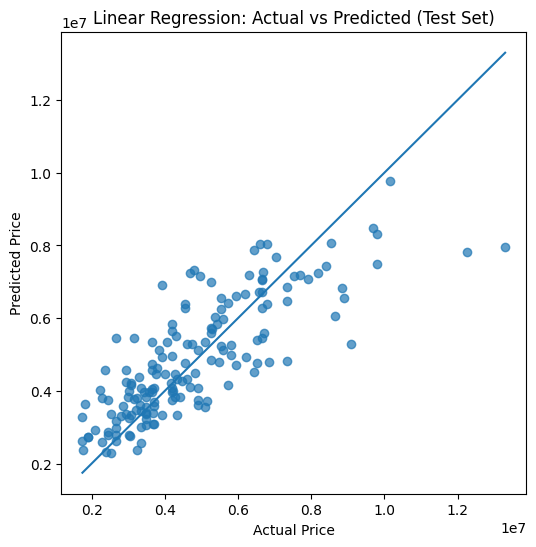

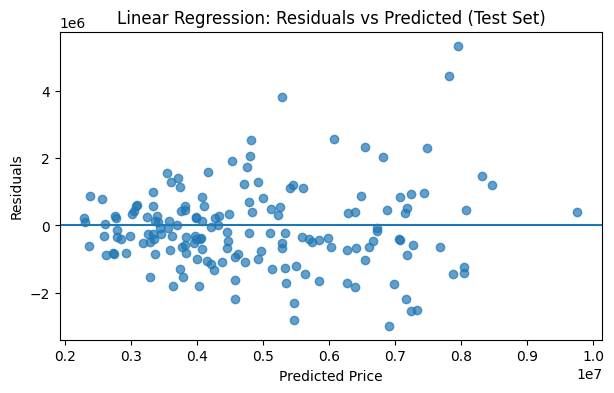

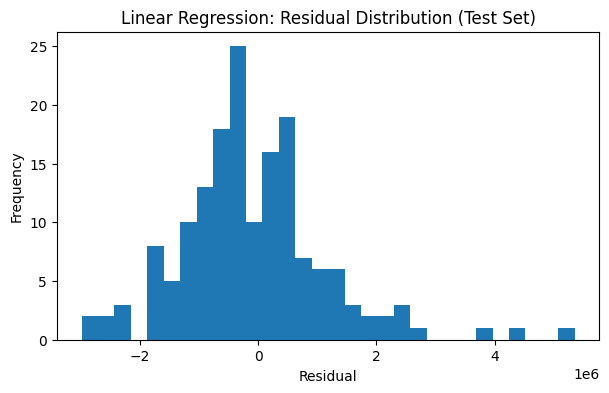

In [61]:
# ===== LR Diagnostic Plots (TEST set) =====
res = y_test - pred_lr

plt.figure(figsize=(6,6))
plt.scatter(y_test, pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted (Test Set)")
plt.show()

plt.figure(figsize=(7,4))
plt.scatter(pred_lr, res, alpha=0.7)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residuals vs Predicted (Test Set)")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(res, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Linear Regression: Residual Distribution (Test Set)")
plt.show()


final comparison table (Ridge tuned vs RF tuned) [TEST set]

In [65]:
# ===== Final Test-set Comparison (Option 1) =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# LR pipeline (scaled)
lr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
lr_pipe.fit(X_train, y_train)
pred_lr = lr_pipe.predict(X_test)

# Ridge tuned (from GridSearchCV)
ridge_best = gs_ridge.best_estimator_
pred_ridge = ridge_best.predict(X_test)

# RandomForest tuned (from RandomizedSearchCV)
rf_best = rs_rf.best_estimator_
pred_rf = rf_best.predict(X_test)

mae_lr, mse_lr, rmse_lr, r2_lr = metrics(y_test, pred_lr)
mae_rg, mse_rg, rmse_rg, r2_rg = metrics(y_test, pred_ridge)
mae_rf, mse_rf, rmse_rf, r2_rf = metrics(y_test, pred_rf)

final_model_metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge (Tuned)", "Random Forest (Tuned)"],
    "MAE": [mae_lr, mae_rg, mae_rf],
    "MSE": [mse_lr, mse_rg, mse_rf],
    "RMSE": [rmse_lr, rmse_rg, rmse_rf],
    "R2": [r2_lr, r2_rg, r2_rf]
}).sort_values(by="R2", ascending=False)

final_model_metrics

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,920296.224378,1.525437e+12,1.235086e+06,0.645774
1,Ridge (Tuned),917245.779532,1.526089e+12,1.235350e+06,0.645622
2,Random Forest (Tuned),937958.932851,1.617744e+12,1.271906e+06,0.624339


In [63]:
# ===== Train Final Model on Full Dataset (BEST MODEL = LR) =====
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

final_model.fit(X, y)

print("Final model trained on full dataset ✅ (Linear Regression Pipeline)")


Final model trained on full dataset ✅ (Linear Regression Pipeline)
